## ---- Denoiser Autoencoder

The term “noise” here could be:

- Produced by a faulty or poor quality image sensor
- Random variations in brightness or color
- Quantization noise
- Artifacts due to JPEG compression
- Image perturbations produced by an image scanner or threshold post-processing
- Poor paper quality (crinkles and folds) when trying to perform OCR
- From the perspective of image processing and computer vision, you should think of noise as anything that could be removed by a really good pre-processing filter.

**Denoising autoencoders are an extension of simple autoencoders;** however, it’s worth noting that denoising autoencoders were not originally meant to automatically denoise an image.

Instead, the denoising autoencoder procedure was invented to help:

- The hidden layers of the autoencoder learn more robust filters
- Reduce the risk of overfitting in the autoencoder
- Prevent the autoencoder from learning a simple identify function


In Vincent et al.’s 2008 ICML paper, Extracting and Composing Robust Features with Denoising Autoencoders, **the authors found that they could improve the robustness of their internal layers (i.e., latent-space representation) by purposely introducing noise to their signal.**

>> Noise was stochastically (i.e., randomly) added to the input data, and then the autoencoder was trained to recover the original, nonperturbed signal.

In [1]:
from files.convautoencoder import ConvAutoencoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

In [2]:
#Load the dataset but don't define the label variables
((trainX, _), (testX, _)) = mnist.load_data()

In [3]:
#Add the black and white channel and also scale
from cgi import test


trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0

### Create some noise to train the denoiser

In [4]:
# sample noise from a random normal distribution centered at 0.5 (since
# our images lie in the range [0, 1]) and a standard deviation of 0.5
trainNoise = np.random.normal(loc=0.5, scale=0.5, size=trainX.shape)
testNoise = np.random.normal(loc=0.5, scale=0.5, size=testX.shape)
#add the noise
trainXNoisy = np.clip(trainX + trainNoise, 0, 1)
testXNoisy = np.clip(testX + testNoise, 0, 1)

### Define the autoencoder and train it

In [6]:
(encoder, decoder, autoencoder) = ConvAutoencoder.build(28,28,1)
autoencoder.compile(loss="mse", optimizer=Adam(learning_rate=1e-3))

In [7]:
#The normal images will be the ones being evaluated on
H = autoencoder.fit(trainXNoisy, trainX, validation_data=(testXNoisy, testX),
                    epochs=25, batch_size = 32)

Epoch 1/25
1875/1875 [==============================] - 14s 6ms/step - loss: 0.0292 - val_loss: 0.0198
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0191 - val_loss: 0.0187
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0179 - val_loss: 0.0180
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0173 - val_loss: 0.0174
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0169 - val_loss: 0.0174
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0165 - val_loss: 0.0171
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0163 - val_loss: 0.0162
Epoch 8/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0161 - val_loss: 0.0183
Epoch 9/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0159 - val_loss: 0.0164
Epoch 10/25
1875/1875 [==============================] - 10s 6ms/step - l

### Plot the results

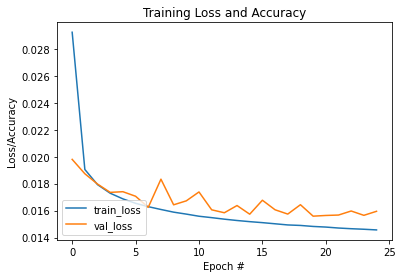

In [8]:
N = np.arange(0, 25)
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

### Make predictions

In [11]:
decoded = autoencoder.predict(testXNoisy)
outputs = None

313/313 [==============================] - 1s 2ms/step


### Save the predicted images

In [13]:
for i in range(0, 8):
    #get the noisy image
    original = (testXNoisy[i]*255).astype("uint8")
    #Get the predictions
    recon = (decoded[i]*255).astype("uint8")

    #Stack the images horizontally
    output = np.hstack([original, recon])

    if outputs is None:
	    outputs = output
        
    else:
        outputs = np.vstack([outputs, output])

cv2.imwrite('...Denoiser/de_results.jpg', output )

True